# S-wave scattering phase shifts

In [1]:
from scipy.integrate import odeint
from scipy.special import struve
from scipy.special import yn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams['figure.dpi'] = 130

##### SI units

In [3]:
angstrom = 1e-10
R = angstrom
r = np.linspace(0, 100, 1024) * angstrom # [m]

hbar = 1.0545718e-34 # [Js]
eV = 1.602176634e-19 # [J]
meV = 1e-3 * eV

In [4]:
# parameters from table 1.
r_0 = 44.6814 * angstrom # [m]
mass_e = 9.10938356e-31 # [kg]
mass_eff_e = 0.47 * mass_e 
mass_eff_h = 0.54  * mass_e
mass_X = mass_eff_e + mass_eff_h
M_red = mass_eff_e * mass_X / (mass_eff_e + mass_X) 

# parameters in table 2
au = 10e-22 * eV # [(m/V)^-2]
r_star = 34 * angstrom # only symmetric phase shift
v_0 = -58.5 * meV
alpha = 52 *  10**3 * au 

In [5]:
E_min = 0.1 * meV
E_max = 60 * meV
E = np.linspace(E_min, E_max, 1024)
k = np.sqrt(2 * M_red * E) / hbar

### Variable Phase Approach

Nonlinear ODE used in VPA: 
$\delta_\rho'(r) = -\frac{2 \mu sin^{2}(\delta_\rho +k r)}{k}$ with IC: $\delta_\rho = 0$

Solving ODE for several values of k

In [6]:
def square_well(r, V_0):
    # define Square well potential with adjustable depth V_0
    V_sw = - V_0 * np.heaviside(R - r, 0)
    return V_sw

In [7]:
## solve ODE using VPA for multiple k in low-E Lim as rho -> inf
def ODE(delta_rho, r, k, V_0):
    top = 2 * M_red * square_well(r, V_0) * np.sin(k * r + delta_rho)**2
    ddeltarho_dr = -(top/(hbar * k))
    return ddeltarho_dr

# ODEINT solver
for k_i in k:
    delta_rho_k = odeint(ODE, 0, r, args=(k_i, v_0))
    ## print accumulation of phase shift:
    # print(delta_rho_k[-1])
    
# # plot results
# plt.figure()
# plt.plot(k,delta_rho_k)
# plt.xlabel('k?')
# plt.ylabel(r'$\delta_\rho(r)$')
# plt.show()

# IV Electron-exciton scattering
### (Schmidt et al.)

We want to compare  the resulting phase shifts for $MoS_2$ in the energy range $ 0 \leq E \leq 60 meV$
to <br>equation (7) **the universal low-energy behaviour of s-wave phase shifts in two dimensional systems**. 
    $$ cot(\delta) \approx \pi^{-1} ln(\frac{E}{E_1})$$

The energy scale $E_1$ defines the 2D scattering length $a_{2D}$ if a weakly bound state (BS) exists in the spectrum close to the exciton-electron scattering threshold, $E_1$ agrees with its binding energy. 

For this calculation, you need to use dimensionless variables. This is probably easiest to implement by we effectively setting $r_0 = 1$. This means that you should define your $U(r)$ in Eq. (32) as $U(R)/U_0$ where $U_0$ is the energy scale $U_0= \hbar^2 / (2m_r r_0)^2$ (in meV).

You should make sure that your phase shift is converged with respect to the distance (because it is formally defined when $r>>r_0$). So you can try to plot the phase shift as a function of r for a fixed k to check this.

In [9]:
r₀ = 1

def keldysh(r): ################## has units [m^-1] but should be dimensionless
    # equation (2)
    V_K = (np.pi / (2 * r_0) * (struve(0, r / r_0) - yn(0, r / r_0)))
    return V_K

def potential_Xe(r): 
    # equation (8)
    dr = r[1] - r[0]
    V_Xe = np.zeros_like(r)
    V_Xe[r <= r_star] = v_0
    V_Xe[r > r_star] = - (alpha / 2) * (np.gradient(keldysh(r[r > r_star])) / dr)**2
    return V_Xe

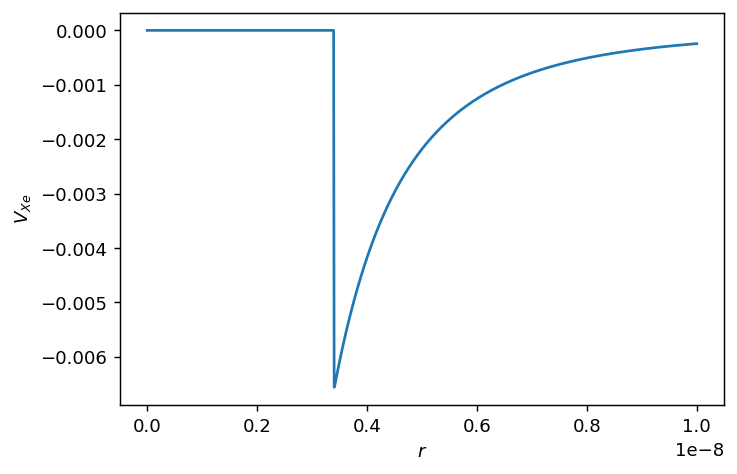

In [10]:
plt.plot(r, potential_Xe(r))
plt.ylabel(r'$ V_{Xe}$')
plt.xlabel(r'$r$')
plt.show()

In [8]:
# in limit of small k \delta is independent of r
# k\cot\delta = -1/a.

# a_2D = - np.tan(delta[1]) / k

#E_1 = 1 / (2 * M_red * (a_2D)**2) 


In [11]:
# print(f"α = {alpha}")
# print(f"V₀ = {v_0}")
# plt.plot(k, np.log(E_k(k) / E_1) / np.pi)
# plt.ylabel(r'$ cot(\delta) \approx \pi^{-1} ln(E/E_1)$')
# plt.xlabel(r'$E$')
# plt.show()